In [24]:
from stl_samplers import AugmentedOUDFollmerSDESTL
from config import get_architecture_specs, get_ref_process
from objectives import *
from toy_targets import funnel
import matplotlib.pyplot as plt


In [25]:
architecture_specs = get_architecture_specs()
ref_process = get_ref_process()

model_def = AugmentedOUDFollmerSDESTL(
    sigma=ref_process.sigma,
    dim=ref_process.data_dim,
    drift_network=ref_process.drift_network,
    tfinal=ref_process.tfinal,
    dt=ref_process.dt,
    step_scheme=ref_process.step_scheme,
    alpha=ref_process.alpha,
    target=ref_process.target,
    tpu=ref_process.tpu,
    detach_stl_drift=ref_process.detach_stl_drift,
    diff_net=ref_process.diff_net,
    detach_dritf_path=ref_process.detach_dritf_path,
    detach_dif_path=ref_process.detach_dif_path,
    m=ref_process.m,
    log=ref_process.log,
    exp_bool=ref_process.exp_bool,
    exact=ref_process.exact
)

In [26]:
import time
for i in range(1, 21):
    s_t = time.time()

    aug_trajectory = model_def(batch_size=300, is_training=True, ode=False)

    g = ou_terminal_loss(lnpi=ref_process.target,
                         sigma=ref_process.sigma,
                         tfinal=ref_process.tfinal,
                         brown=False)

    loss = relative_kl_objective(augmented_trajectory=aug_trajectory,
                                 g=g,
                                 stl=False,
                                 trim=2,
                                 dim=ref_process.data_dim)

    print(loss)
    adam = torch.optim.Adam(ref_process.drift_network.parameters(), lr=0.001)
    adam.zero_grad()
    loss.backward()
    adam.step()

    e_t = time.time()

    print(f"Epoch {i}, time of execution: {e_t - s_t}")

    if i % 10 == 0:
        x, v = [], []
        for i in aug_trajectory[0][:, -1, :10]:
            v.append(i[0].detach().numpy())
            x.append(i[1].detach().numpy())

        fig, axes = plt.subplots(1, 2, constrained_layout=True)
        ax = axes[0]
        ax.scatter(x, v, marker=".", alpha=0.05, rasterized=True)
        ax.set_xlim(-5, 5)
        ax.set_ylim(-5, 5)
        ax.set_xlabel("$x_0$")
        ax.set_ylabel("$v$")

        ax = axes[1]
        ax.scatter(x, v, marker=".", alpha=0.05, rasterized=True)
        ax.set_xlim(-20, 20)
        ax.set_ylim(-9, 9)
        ax.set_xlabel("$x_0$")
        ax.set_ylabel("$v$")

        plt.show()


Epoch: 1, time of execution: 56.997649908065796
Loss: 1.3097038269042969
Epoch: 2, time of execution: 55.84949517250061
Loss: 1.7486457824707031
Epoch: 3, time of execution: 54.807656049728394
Loss: 1.451231837272644
Epoch: 4, time of execution: 54.34245800971985
Loss: 1.489194631576538
Epoch: 5, time of execution: 54.752230167388916
Loss: 1.544825792312622
Epoch: 6, time of execution: 59.704489946365356
Loss: 1.4110465049743652
Epoch: 7, time of execution: 56.00759696960449
Loss: 1.6031503677368164
Epoch: 8, time of execution: 60.97948598861694
Loss: 1.4889973402023315
Epoch: 9, time of execution: 54.27428698539734
Loss: 1.5027248859405518
Epoch: 10, time of execution: 55.79767990112305
Loss: 1.3270926475524902
Epoch: 11, time of execution: 54.28939485549927
Loss: 1.4175121784210205
Epoch: 12, time of execution: 54.556509017944336
Loss: 1.5271728038787842
Epoch: 13, time of execution: 55.165348052978516
Loss: 1.5199214220046997
Epoch: 14, time of execution: 73.54045796394348
Loss: 1.6

In [31]:
aug_trajectory_for_plotting = model_def(batch_size=300, is_training=True, ode=False)

In [32]:
x, v = [], []
for i in aug_trajectory_for_plotting[0][:, -1, :10]:
    v.append(i[0].detach().numpy())
    x.append(i[1].detach().numpy())

t, s = funnel(10, sig=3, clip_y=11)

x_i, v_i = [], []
true_samples = s(5000)
for j in true_samples:
    v_i.append(j[0].detach().numpy())
    x_i.append(j[1].detach().numpy())

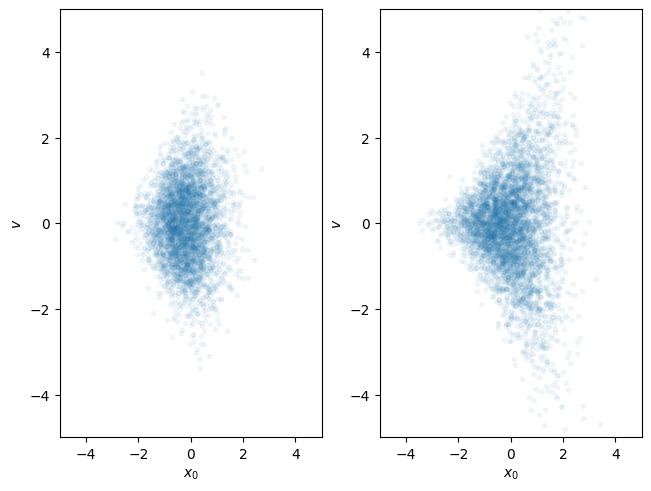

In [33]:
# plot data
fig, axes = plt.subplots(1, 2, constrained_layout=True)
ax = axes[0]
ax.scatter(x, v, marker=".", alpha=0.05, rasterized=True)
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_xlabel("$x_0$")
ax.set_ylabel("$v$")

# plot analytic log-likelihood
ax = axes[1]
ax.scatter(x_i, v_i, marker=".", alpha=0.05, rasterized=True)
ax.set_xlim(-20, 20)
ax.set_ylim(-9, 9)
ax.set_xlabel("$x_0$")
ax.set_ylabel("$v$")

plt.show()

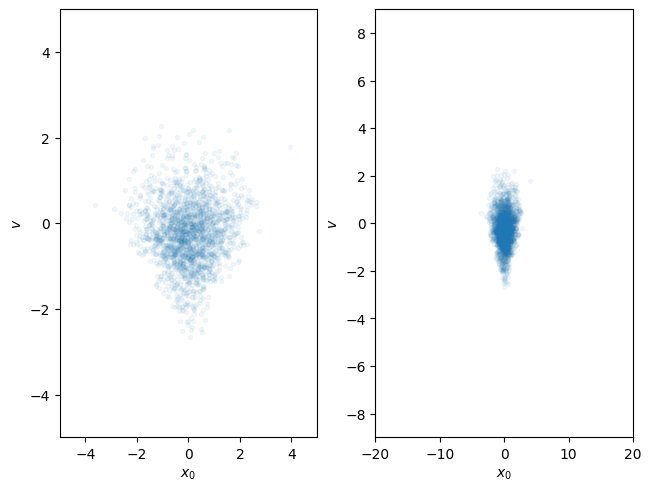

In [30]:
x, v = [], []
for i in aug_trajectory_for_plotting[0][:, -1, :10]:
    v.append(i[0].detach().numpy())
    x.append(i[1].detach().numpy())

fig, axes = plt.subplots(1, 2, constrained_layout=True)
ax = axes[0]
ax.scatter(x, v, marker=".", alpha=0.05, rasterized=True)
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_xlabel("$x_0$")
ax.set_ylabel("$v$")

ax = axes[1]
ax.scatter(x, v, marker=".", alpha=0.05, rasterized=True)
ax.set_xlim(-20, 20)
ax.set_ylim(-9, 9)
ax.set_xlabel("$x_0$")
ax.set_ylabel("$v$")

plt.show()